# Assignment 1

## Laurence Warner

## [*lpwarner@uchicago.edu*](lpwarner@uchicago.edu)

# Simulating your income

Model as in question, except error term variable $ln(\epsilon)$ is treated as $\epsilon$, with $\epsilon$ distributed normally, which simplifies notation and changes nothing.

Time periods standardised to years after graduating, so 2019 corresponds to 0.

### Problem 1

In [102]:
import numpy as np

In [103]:
import matplotlib.pyplot as plt

In [104]:
import matplotlib.mlab as mlab

Create simulation for 10,000 individuals over 40 time periods.

In [105]:
def sim(inc0, error_mean, error_sd, pers, g):
    np.random.seed(1)
    ln_errors = np.random.normal(loc = error_mean, scale = error_sd, size = (40,10000))

    ln_inc0 = np.log(inc0)

    ln_inc = np.zeros((40, 10000))
    #can work with whole rows of arrays at once (every individual for a given time period)
    ln_inc[0] = ln_inc0 + ln_errors[0]

    for t in range(1, 40):
        ln_inc[t] = (1 - pers) * (ln_inc0 + g * t) + pers * ln_inc[t - 1] + ln_errors[t]
        
    #convert income array out of log and return
    inc = np.exp(ln_inc)

    return inc

Problem 1 parameters

In [106]:
inc0 = 80000
error_mean = 0
error_sd = 0.1
pers = 0.2
g = 0.03

Run simulation with specified parameters

In [107]:
income_sim = sim(inc0, error_mean, error_sd, pers, g)

Pick out one individual's column and store as an array

In [108]:
ind = income_sim[:,3776]

Plot income path for individual 3776.

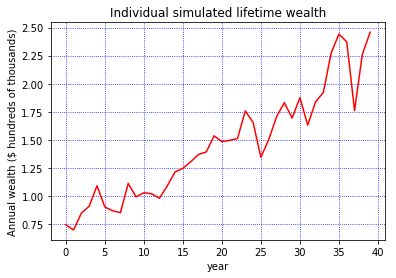

In [109]:
plt.plot(ind/100000, 'r-')
plt.title("Individual simulated lifetime wealth")
plt.ylabel("Annual wealth ($ hundreds of thousands)")
plt.xlabel("year")
plt.grid(b=True, which = 'major', color = 'b', ls = 'dotted')
plt.show()

Compare to expected path with 3% growth rate

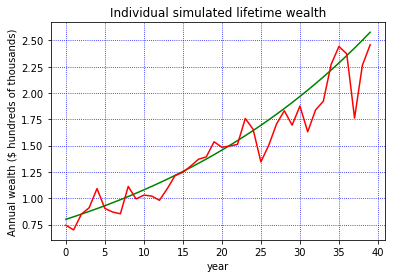

In [136]:
e = np.zeros(40)
for t in range(40):
    e[t] = 80000 * np.exp(0.03 * t)
plt.plot(e/100000, 'g-')

plt.plot(ind/100000, 'r-')
plt.title("Individual simulated lifetime wealth")
plt.ylabel("Annual wealth ($ hundreds of thousands)")
plt.xlabel("year")
plt.grid(b=True, which = 'major', color = 'b', ls = 'dotted')
plt.show()

Slight underperformance from individual 3776 in his latter days.

### Problem 2

Plot histogram with 50 bins for year 0 for 10,000 simulations.

In [110]:
income_sim0 = income_sim[0]

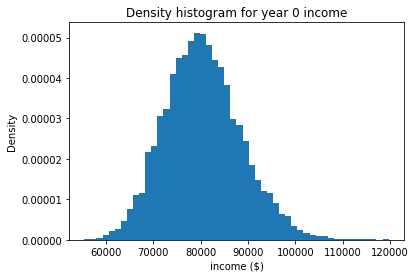

In [111]:
n, bins, patches = plt.hist(income_sim0, bins = 50, density = True)
plt.title('Density histogram for year 0 income')
plt.ylabel('Density')
plt.xlabel('income ($)')
plt.show()

What % will earn more than $100,000?

Method: use 'Fancy Indexing' using an array of Booleans to identify number of elements satisfying condition

In [112]:
# create array containing only values satisfying condition
rich = income_sim0[income_sim0 > 100000]
# calculate relative lengths of two arrays
rich_percent = len(rich)/len(income_sim0) * 100
print("Percentage earning more than $100000 is %", rich_percent, sep = '')

Percentage earning more than $100000 is %1.26


What % will earn less than $70,000?

In [113]:
rich = income_sim0[income_sim0 < 70000]
rich_percent = len(rich)/len(income_sim0) * 100
print("Percentage earning less than $70,000 is %", rich_percent, sep = '')

Percentage earning less than $70,000 is %8.83


Is the distribution normal?

In [114]:
#Extract fitted parameters for normal distribution
mean = income_sim0.mean()
std = income_sim0.std()

In [115]:
#Set up x values for normal distribution plot to be same as histogram
x = np.linspace(min(income_sim0), max(income_sim0), 100)

In [116]:
#Find corresponding y values
y = mlab.normpdf(x, mean, std)

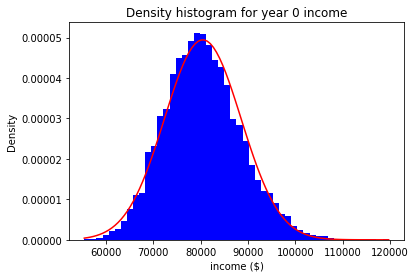

In [117]:
#Plot curves together
n, bins, patches = plt.hist(income_sim0, bins = 50, density = True, color = 'b')
plt.title('Density histogram for year 0 income')
plt.ylabel('Density')
plt.xlabel('income ($)')

plt.plot(x, y, color = 'r')

plt.show()

It is fairly close to being symmetric and bell-curved.

### Problem 3

Method: looping over list

In [118]:
#create repayment array
repay = income_sim * 0.1

In [119]:
year_list = []
for s in range(10000):
    repay_sum = 0
    sim_repay = repay[ : , s]
    for t in range(40):
        repay_sum += sim_repay[t]
        if repay_sum > 95000:
            year_list.append(t)
            break

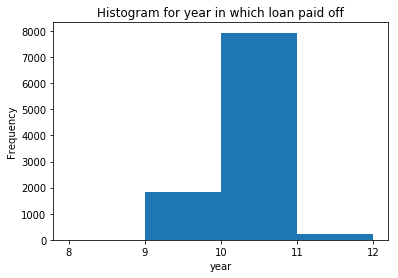

In [120]:
#apparently plt.hist supports data in a list as well as array
n, bins, patches = plt.hist(year_list, bins = np.arange(min(year_list), max(year_list)+2), density = False)
plt.title('Histogram for year in which loan paid off')
plt.xticks(np.arange(min(year_list), max(year_list)+2))
plt.ylabel('Frequency')
plt.xlabel('year')
plt.show()

In what % of simulations are you able to pay off the loan within 10 years, i.e. on or below year 9 (2028)?

In [121]:
num_quick = 0
for year in year_list:
    if year <= 9:
        num_quick += 1
percent = num_quick/len(year_list) * 100
print(percent, "% are able to pay off with 10 years", sep = '')

18.48% are able to pay off with 10 years


### Problem 4

Repeat Problem 1 with new parameters to obtain new simulation data

In [123]:
inc0 = 85000
error_mean = 0
error_sd = 0.15
pers = 0.2
g = 0.03
sim2 = sim(inc0, error_mean, error_sd, pers, g)

In [129]:
repay2 = sim2 * 0.1
year_list2 = []
for s in range(10000):
    repay_sum = 0
    sim_repay = repay2[ : , s]
    for t in range(40):
        repay_sum += sim_repay[t]
        if repay_sum > 95000:
            year_list2.append(t)
            break

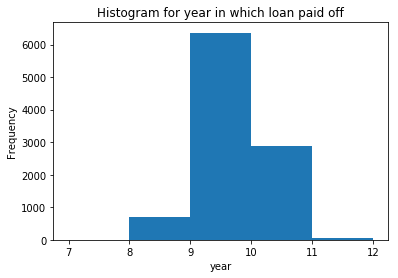

In [130]:
n, bins, patches = plt.hist(year_list2, bins = np.arange(min(year_list2), max(year_list2)+2), density = False)
plt.title('Histogram for year in which loan paid off')
plt.xticks(np.arange(min(year_list2), max(year_list2)+2))
plt.ylabel('Frequency')
plt.xlabel('year')
plt.show()

In [133]:
num_quick2 = 0
for year in year_list2:
    if year <= 9:
        num_quick2 += 1
percent = num_quick2/len(year_list2) * 100
print(round(percent,2), "% are able to pay off with 10 years", sep = '')

70.68% are able to pay off with 10 years


A much higher percentage of people are able to repay quickly, because the starting salary is higher. Some people still take 11 years because variance is high.